# Notes

Doing checks and experiments here with the code.

## 1. Neural Network Input Passing
When passing a sequence of inputs over time to the neural network, does it matter whether the input
- is given staggered or
- is given all at once?

In [1]:
from simulation import Params
from agent import Rnn
import torch
params = Params.from_json('parameters.json')
rnn = Rnn(params)

initial_hidden_state = None
first_input = torch.tensor([[0.5, -0.3, 1.0, 0.2]], dtype=torch.float32)
second_input = torch.tensor([[0.1, 0.7, 0.3, 0.5]], dtype=torch.float32)
third_input = torch.tensor([[0.2, -0.5, 0.8, 0.7]], dtype=torch.float32)
first_output, first_hidden_state = rnn(first_input, initial_hidden_state)
second_output, second_hidden_state = rnn(second_input, first_hidden_state)
third_output, third_hidden_state = rnn(third_input, second_hidden_state)

sequence_input = torch.tensor([
    [0.5, -0.3, 1.0, 0.2],
    [0.1, 0.7, 0.3, 0.5],
    [0.2, -0.5, 0.8, 0.7]
], dtype=torch.float32)
output, sequence_hidden_state = rnn(sequence_input, initial_hidden_state)
print('1. step output:', first_output)
print('2. step output:', second_output)
print('3. step output:', third_output, '=', output, 'sequence output')
print('first hidden state:', first_hidden_state)
print('second hidden state:', second_hidden_state)
print('third hidden state:', third_hidden_state, '=', sequence_hidden_state, 'sequence hidden state')

1. step output: tensor([-0.2043, -0.7556, -0.5541])
2. step output: tensor([ 0.0457, -0.5564, -0.2010])
3. step output: tensor([-0.2107, -0.6166, -0.5824]) = tensor([-0.2107, -0.6166, -0.5824]) sequence output
first hidden state: tensor([[-0.8255,  0.7469]])
second hidden state: tensor([[-0.0388,  0.3504]])
third hidden state: tensor([[-0.8607,  0.5341]]) = tensor([[-0.8607,  0.5341]]) sequence hidden state


So it does not matter whether the inputs are passed in a staggered fashion or all at once.

## 2. Neural Network Recurrent Layer Outputs
Understand the outputs of the recurrent hidden layer.

In [2]:
from simulation import Params
from agent import Rnn
import torch

params = Params.from_json('parameters.json')
model = Rnn(params)
input_data = torch.rand(1, model.input_size)
print('input_data:', input_data)
hidden_output, hidden_state = model.forward(input_data, torch.zeros(1, model.hidden_size))
print('hidden_output:', hidden_output)
print('hidden_state:', hidden_state)


input_data: tensor([[0.7092, 0.0072, 0.0412, 0.1066]])
hidden_output: tensor([ 0.3842, -0.0550, -0.1247])
hidden_state: tensor([[-0.5950,  0.7018]])


The forward function returns the output from the hidden layer to the output layer and the updated hidden state.

## 3. Test Environment Function
**Objective:** Test the get_closest_food function visually. 

closest_position: [ 84.78879334 149.97336021]
closest_distance: 6.753026452771308


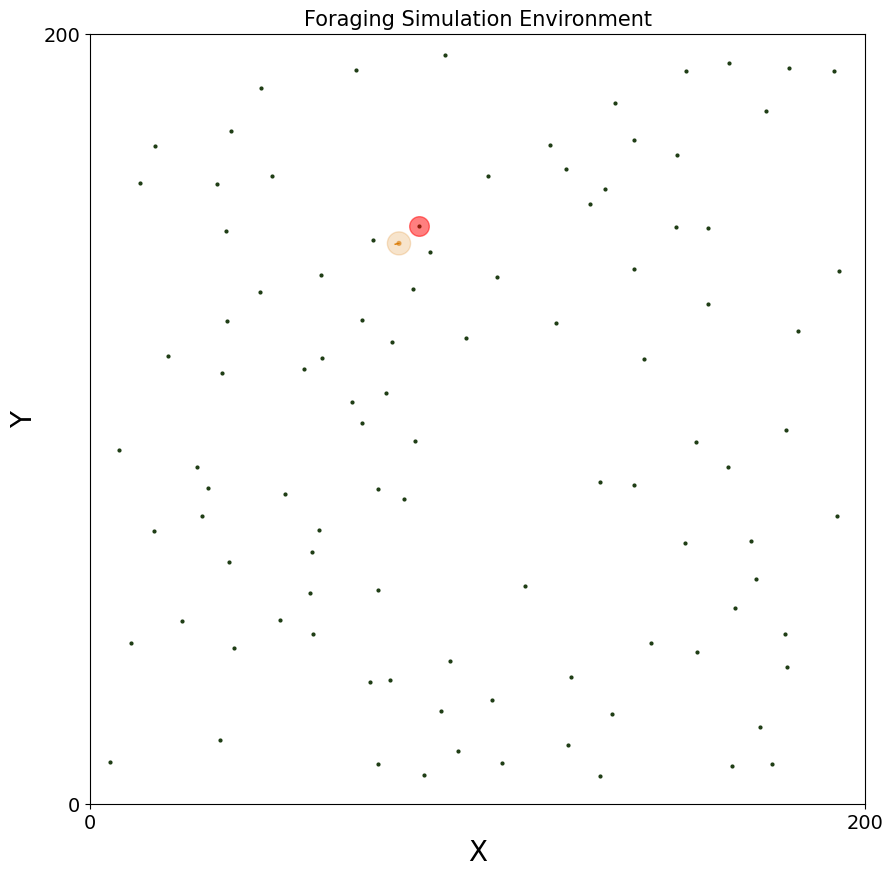

In [3]:
from environment import Environment
from agent import Agent, Rnn
from simulation import Params
from visualization import visualize_state
import matplotlib.pyplot as plt
import numpy as np

params = Params.from_json('parameters.json')
environment = Environment(params)
model = Rnn(params)
agent = Agent(model, params)
agent.position = environment.get_random_position()

# extra test for periodic boundaries
# agent.position = np.array([environment.size - 10, environment.size/2])
# agent.food_mask = np.zeros(2, dtype=bool)
# environment.food_positions = np.asarray([[environment.size/3, environment.size/2], [10, environment.size/2]])
# environment.num_food = 2

ax = visualize_state(environment, [agent])

agent.perception_radius = environment.size
closest_position, closest_distance, closest_index = environment.get_closest_food(agent)
print('closest_position:', closest_position)
print('closest_distance:', closest_distance)

ax.scatter(closest_position[0], closest_position[1], color='red', s=200, alpha=0.5)
plt.show()

## 4. Test Agent Helper Functions 

In [16]:
from agent import vector_to_angle, calculate_angle_difference
import numpy as np

assert(vector_to_angle(np.asarray([1, 0]))/np.pi == 0.0)
assert(vector_to_angle(np.asarray([0, 1]))/np.pi == 0.5)
assert(vector_to_angle(np.asarray([-1, 0]))/np.pi == 1.0)
assert(vector_to_angle(np.asarray([0, -1]))/np.pi == -0.5)
assert(vector_to_angle(np.asarray([1, 1]))/np.pi == 0.25)
assert(vector_to_angle(np.asarray([0, 0]))/np.pi == 0.0)
assert(calculate_angle_difference(np.pi, np.pi*0.5) == 0.5*np.pi)
assert(calculate_angle_difference(np.pi*0.5, np.pi) == -0.5*np.pi)
assert(calculate_angle_difference(np.pi*0.5, 3*np.pi/2) == -np.pi)
assert(calculate_angle_difference(0, 0) == 0)
assert(calculate_angle_difference(0, 2*np.pi) == 0)
assert(calculate_angle_difference(9/10*np.pi, 1/10*np.pi) == 8/10*np.pi)
assert(calculate_angle_difference(1/10*np.pi, 9/10*np.pi) == -8/10*np.pi)
assert(calculate_angle_difference(1/10*np.pi, 19/10*np.pi) == 0.2*np.pi)
assert(calculate_angle_difference(0, np.pi) == -np.pi)
assert(calculate_angle_difference(np.pi, 3*np.pi/2) == -np.pi/2)